<a href="https://colab.research.google.com/github/Edwin-svg/Data_Minning_Arima-Sarima/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.2 MB/s eta 0:00:00


In [2]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = read_csv('Bri_saham.csv', header=0, index_col=0, parse_dates=True)
series = df['Close']
df.tail()

,Open,High,Low,Close,Volume,AdjustedClose
Date,,,,,,
2023-07-14,5450.0,5525.0,5425.0,5525.0,127814200,5525.0
2023-07-17,5550.0,5625.0,5525.0,5575.0,166951300,5575.0
2023-07-18,5625.0,5700.0,5600.0,5625.0,141884700,5625.0
2023-07-20,5575.0,5650.0,5550.0,5625.0,111117300,5625.0
2023-07-21,5600.0,5625.0,5575.0,5625.0,63094600,5625.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2420 entries, 2013-07-26 to 2023-07-21
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2420 non-null   float64
 1   High           2420 non-null   float64
 2   Low            2420 non-null   float64
 3   Close          2420 non-null   float64
 4   Volume         2420 non-null   int64  
 5   AdjustedClose  2420 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 132.3 KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume,AdjustedClose
count,2420.000000,2420.000000,2420.000000,2420.000000,2.420000e+03,2420.000000
mean,7094.522727,7173.130165,7015.865702,7094.894628,9.569334e+07,3197.048816
std,3807.136625,3845.724521,3779.982111,3814.496538,9.017187e+07,1046.368947
min,2250.000000,2270.000000,2160.000000,2170.000000,1.261460e+06,1239.010000
25%,4017.500000,4070.000000,3967.500000,4020.000000,2.594228e+07,2242.657500
50%,4715.000000,4750.000000,4650.000000,4710.000000,7.697245e+07,3063.380000
75%,10875.000000,10950.000000,10700.000000,10825.000000,1.344169e+08,4146.294000
max,16450.000000,16825.000000,16425.000000,16450.000000,8.726073e+08,5625.000000


<Axes: xlabel='Date'>

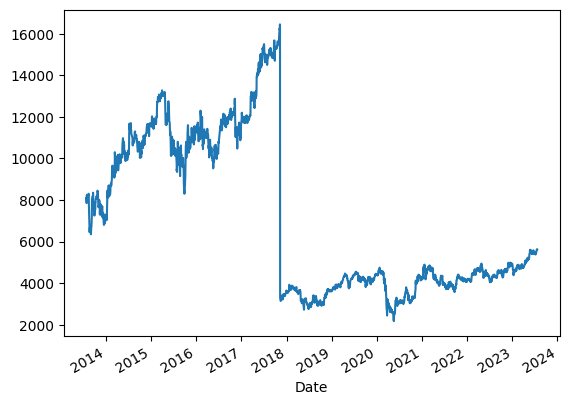

In [7]:
series.plot()

<Axes: xlabel='Date'>

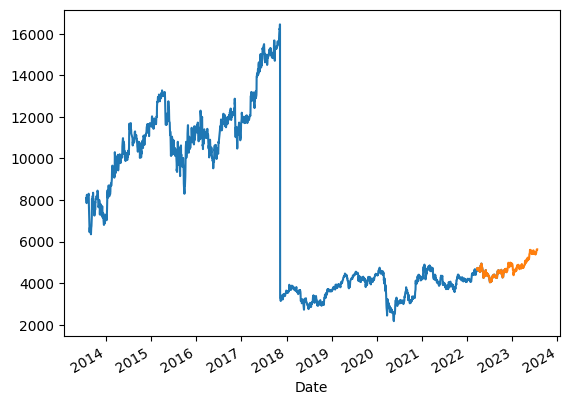

In [8]:
train, test = series[:2246], series[2100:]
n = len(series)
n_train = len(train)
n_test = len(test)

fig, ax = pyplot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [9]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                             start_p=0,
                             start_q=2,
                            test="adf",
                            seasonal=False,
                            trace = True,
                            stepwise=False)
  return automodel

In [10]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32241.249, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32242.683, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=32243.373, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=32245.365, Time=0.46 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=32245.207, Time=0.51 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=32246.430, Time=0.85 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32242.709, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32242.967, Time=1.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32242.456, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=32244.413, Time=3.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=32245.319, Time=2.71 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=32243.445, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32245.446, Time=0.83 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32243.729, Time=4.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=32245.509, Time=3.95

In [11]:
test.shape[0]

320

In [12]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2246    4598.440980
2247    4596.881960
2248    4595.322940
2249    4593.763920
2250    4592.204900
           ...     
2561    4107.349666
2562    4105.790646
2563    4104.231626
2564    4102.672606
2565    4101.113586
Length: 320, dtype: float64

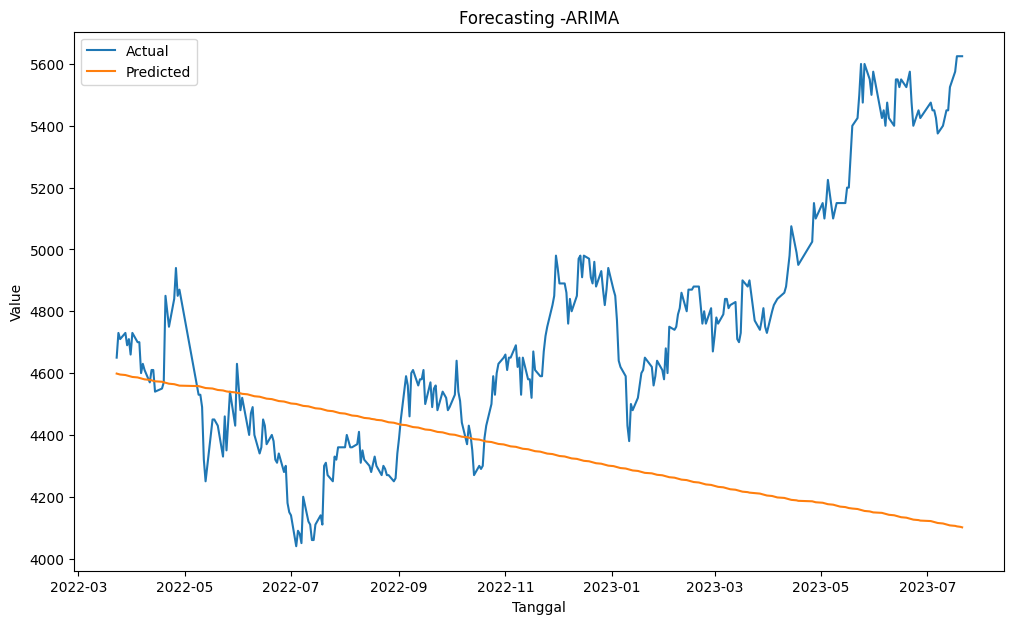

In [13]:
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual')
pyplot.plot(test.index, predictions_arima, label='Predicted')
pyplot.title('Forecasting -ARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend()

In [14]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 622.634


<Axes: >

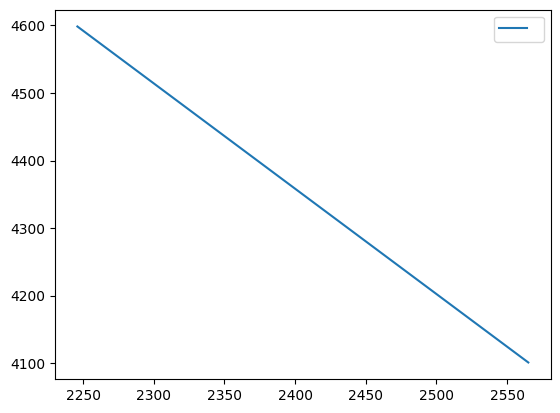

In [15]:
#Visualization
predictions_arima.plot(legend = True)
#pyplot.plot(test.index, predictions_arima, label='Predicted')

In [16]:
predictions_arima.describe()

count     320.000000
mean     4349.777283
std       144.240952
min      4101.113586
25%      4225.445434
50%      4349.777283
75%      4474.109131
max      4598.440980
dtype: float64

**COBA 2**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:
data = pd.read_csv("Bri_saham.csv")

In [40]:
data

,Date,Open,High,Low,Close,Volume,AdjustedClose
0,20130726,8100.0,8150.0,8000.0,8100.0,16101000,1580.470
1,20130729,8000.0,8000.0,7800.0,7850.0,20971500,1531.690
2,20130730,8000.0,8150.0,7950.0,8100.0,11043000,1580.470
3,20130731,8250.0,8250.0,8000.0,8250.0,20760000,1609.738
4,20130801,8200.0,8300.0,8100.0,8150.0,22037000,1590.226
...,...,...,...,...,...,...,...
2415,20230714,5450.0,5525.0,5425.0,5525.0,127814200,5525.000
2416,20230717,5550.0,5625.0,5525.0,5575.0,166951300,5575.000
2417,20230718,5625.0,5700.0,5600.0,5625.0,141884700,5625.000
2418,20230720,5575.0,5650.0,5550.0,5625.0,111117300,5625.000


In [41]:
type(data)

pandas.core.frame.DataFrame

In [42]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Date   Open   High    Low  Close  Volume  AdjustedClose
0     False  False  False  False  False   False          False
1     False  False  False  False  False   False          False
2     False  False  False  False  False   False          False
3     False  False  False  False  False   False          False
4     False  False  False  False  False   False          False
...     ...    ...    ...    ...    ...     ...            ...
2415  False  False  False  False  False   False          False
2416  False  False  False  False  False   False          False
2417  False  False  False  False  False   False          False
2418  False  False  False  False  False   False          False
2419  False  False  False  False  False   False          False

[2420 rows x 7 columns]>

In [43]:
data.isnull().sum()/len(data)

Date             0.0
Open             0.0
High             0.0
Low              0.0
Close            0.0
Volume           0.0
AdjustedClose    0.0
dtype: float64

In [44]:
data = data.drop(["Open","Low", "High", "AdjustedClose", "Volume"],axis="columns")

In [45]:
data.isnull().sum()/len(data)

Date     0.0
Close    0.0
dtype: float64

In [46]:
#Mengubah tanggal menjadi index
con = data[ 'Date']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1970-01-01 00:00:00.020130726',
               '1970-01-01 00:00:00.020130729',
               '1970-01-01 00:00:00.020130730',
               '1970-01-01 00:00:00.020130731',
               '1970-01-01 00:00:00.020130801',
               '1970-01-01 00:00:00.020130802',
               '1970-01-01 00:00:00.020130812',
               '1970-01-01 00:00:00.020130813',
               '1970-01-01 00:00:00.020130814',
               '1970-01-01 00:00:00.020130815',
               ...
               '1970-01-01 00:00:00.020230707',
               '1970-01-01 00:00:00.020230710',
               '1970-01-01 00:00:00.020230711',
               '1970-01-01 00:00:00.020230712',
               '1970-01-01 00:00:00.020230713',
               '1970-01-01 00:00:00.020230714',
               '1970-01-01 00:00:00.020230717',
               '1970-01-01 00:00:00.020230718',
               '1970-01-01 00:00:00.020230720',
               '1970-01-01 00:00:00.020230721'],
              dtype=

In [47]:
ts= data['Close']
ts.head(10)

Date
1970-01-01 00:00:00.020130726    8100.0
1970-01-01 00:00:00.020130729    7850.0
1970-01-01 00:00:00.020130730    8100.0
1970-01-01 00:00:00.020130731    8250.0
1970-01-01 00:00:00.020130801    8150.0
1970-01-01 00:00:00.020130802    8200.0
1970-01-01 00:00:00.020130812    8250.0
1970-01-01 00:00:00.020130813    8250.0
1970-01-01 00:00:00.020130814    8300.0
1970-01-01 00:00:00.020130815    8300.0
Name: Close, dtype: float64

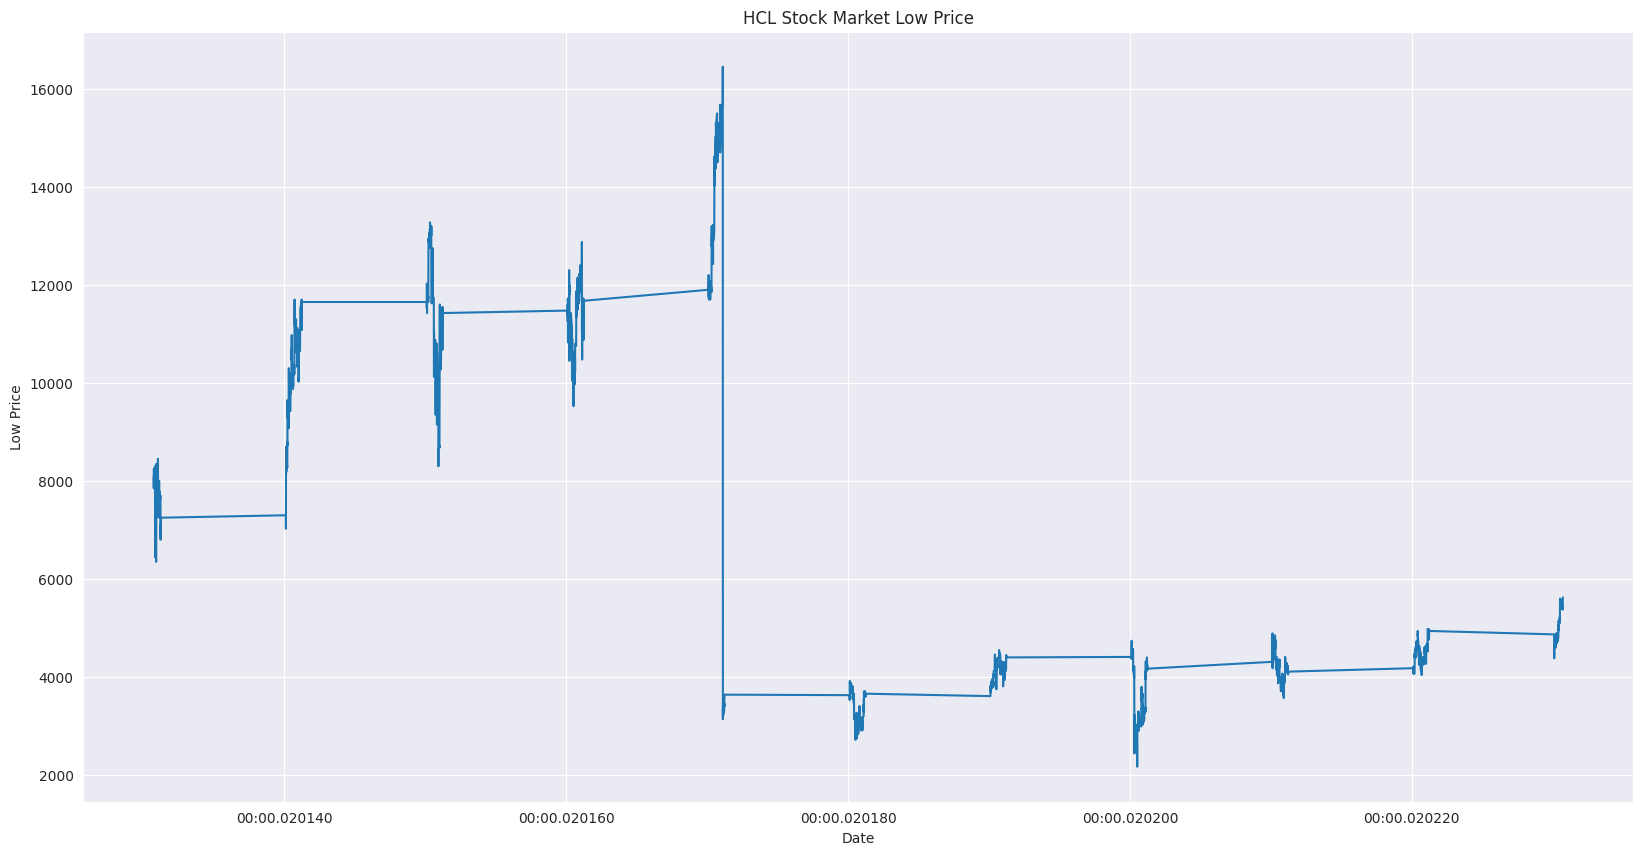

In [48]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('HCL Stock Market Low Price')
plt.plot(data['Close'])

In [49]:
#Deklarasi fungsi untuk mengecek stasioneritas data
# Deklarasi fungsi untuk mengecek stasioner data
from statsmodels.tsa.stattools import adfuller
def test_stasionarity(timeseries):
  # Determinate rolling statis
  rolmen = timeseries.rolling(window =12).mean()
  rolstd = timeseries.rolling(window=12).std()

  # Plot rolling statistic :
  orig = plt.plot(timeseries, color='blue', label = 'Original')
  mean = plt.plot(rolmen, color='red', label = 'Rolling Mean')
  std = plt.plot(rolstd, color='black', label= 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  #Perform Dickey-Fuller test
  print('Result of Dickey-Fuller Test: ')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statuctic', 'p-value','#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

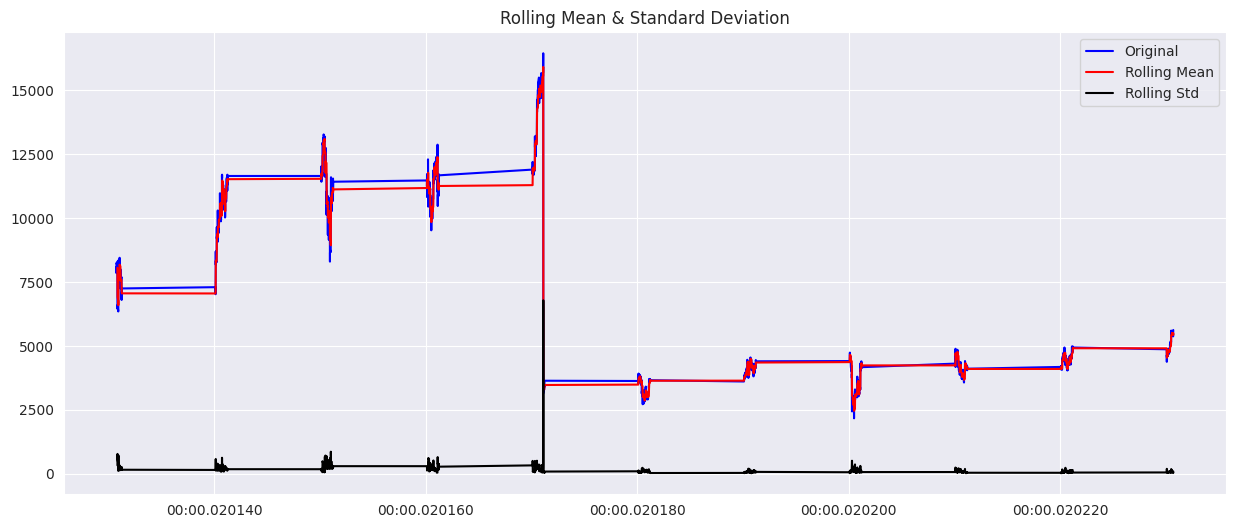

Result of Dickey-Fuller Test: 
Test Statuctic                   -1.966614
p-value                           0.301401
#Lags Used                        0.000000
Number of Observations Used    2419.000000
Critical Value (1%)              -3.433056
Critical Value (5%)              -2.862736
Critical Value (10%)             -2.567406
dtype: float64


In [50]:
test_stasionarity(ts)

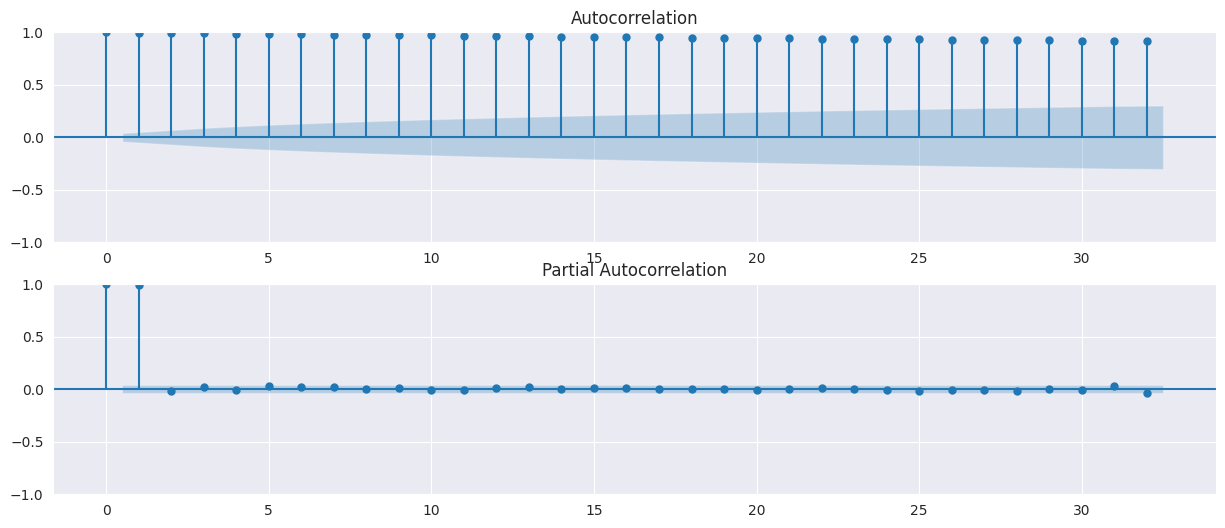

In [51]:
plt.figure()
plt. subplot (211)
plot_acf(ts, ax=plt.gca(), lags=32)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=32)
plt.show()

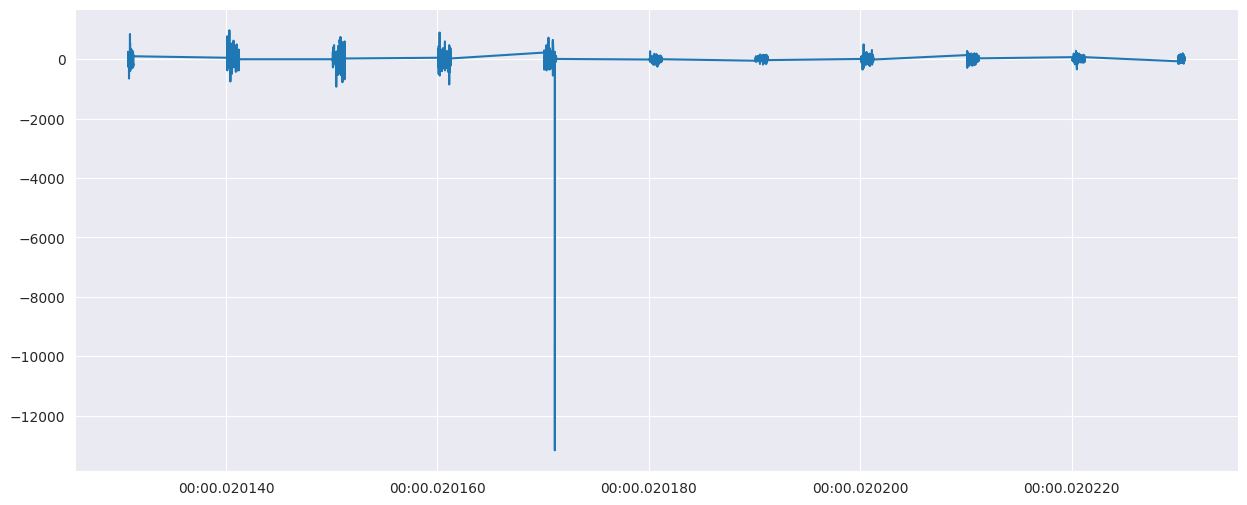

In [52]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

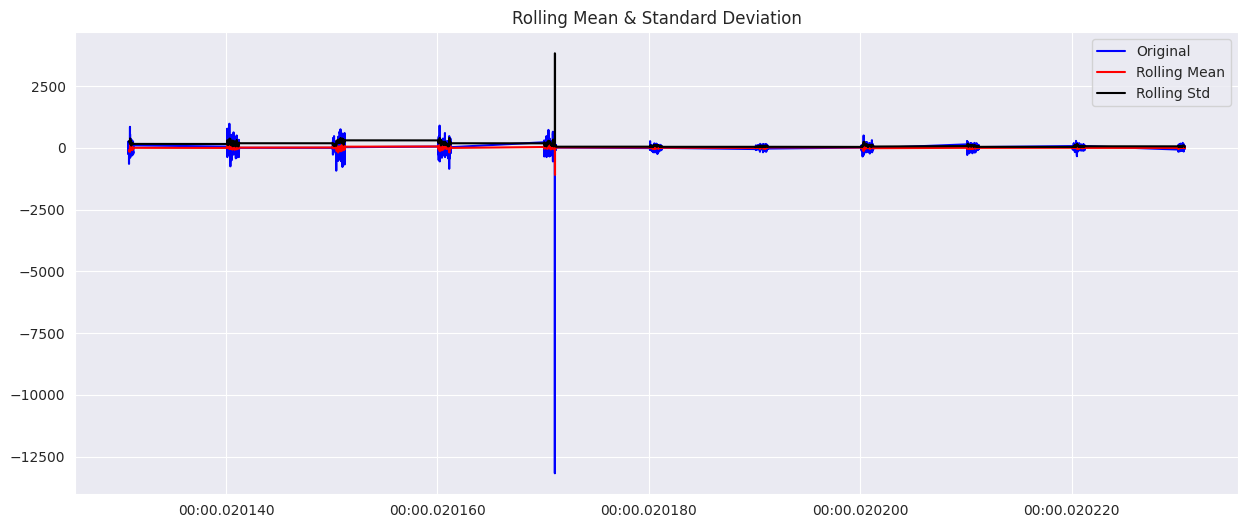

Result of Dickey-Fuller Test: 
Test Statuctic                  -48.392410
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2418.000000
Critical Value (1%)              -3.433057
Critical Value (5%)              -2.862736
Critical Value (10%)             -2.567407
dtype: float64


In [53]:
test_stasionarity(ts_diff_1)

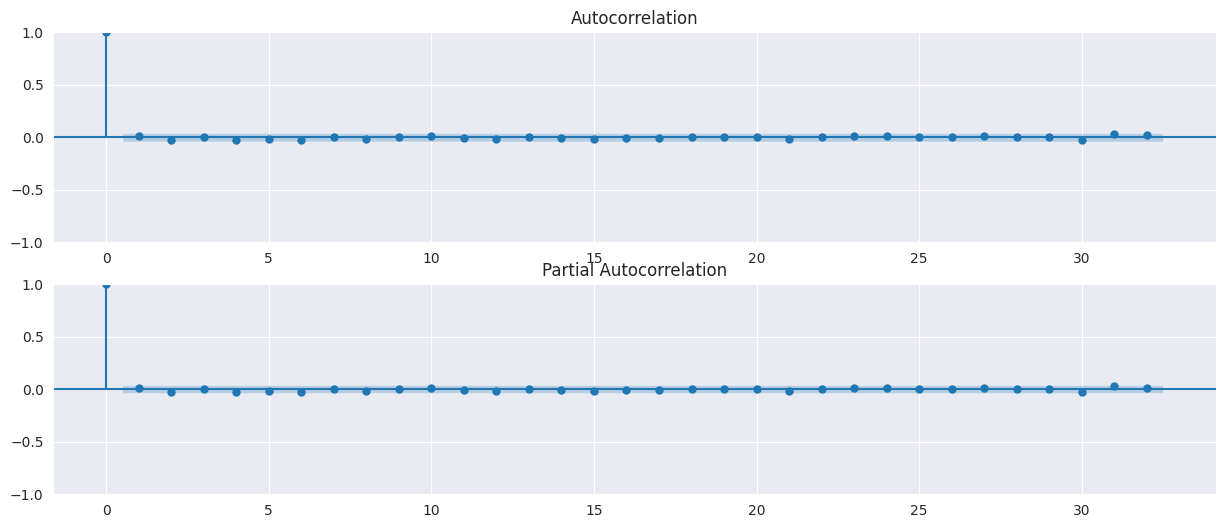

In [54]:
plt.figure()
plt. subplot (211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=32)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=32)
plt.show()

In [55]:
test_size = int(len(ts)*0.9)

In [56]:
train,test = data.iloc[:-test_size], data.iloc[-test_size:]
x_train,x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((242, 1), (242,), (2178, 1), (242,))

In [57]:
from pmdarima.arima import auto_arima

model = pm.auto_arima(train,
                             start_p=0,
                             start_q=2,
                            test="adf",
                            seasonal=False,
                            trace = True,
                            stepwise=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5090.570, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4476.651, Time=0.66 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=1.91 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=1.90 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=4.40 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3300.636, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3299.160, Time=0.53 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3300.909, Time=0.24 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=3302.550, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3299.273, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3300.788, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3302.978, Time=0.53 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AI

In [58]:
model_ARIMA = auto_arima(ts, order=(1,0,2))
forecast = model_ARIMA.predict(n_periods=150)
print(forecast)

2420    5625.0
2421    5625.0
2422    5625.0
2423    5625.0
2424    5625.0
         ...  
2565    5625.0
2566    5625.0
2567    5625.0
2568    5625.0
2569    5625.0
Length: 150, dtype: float64


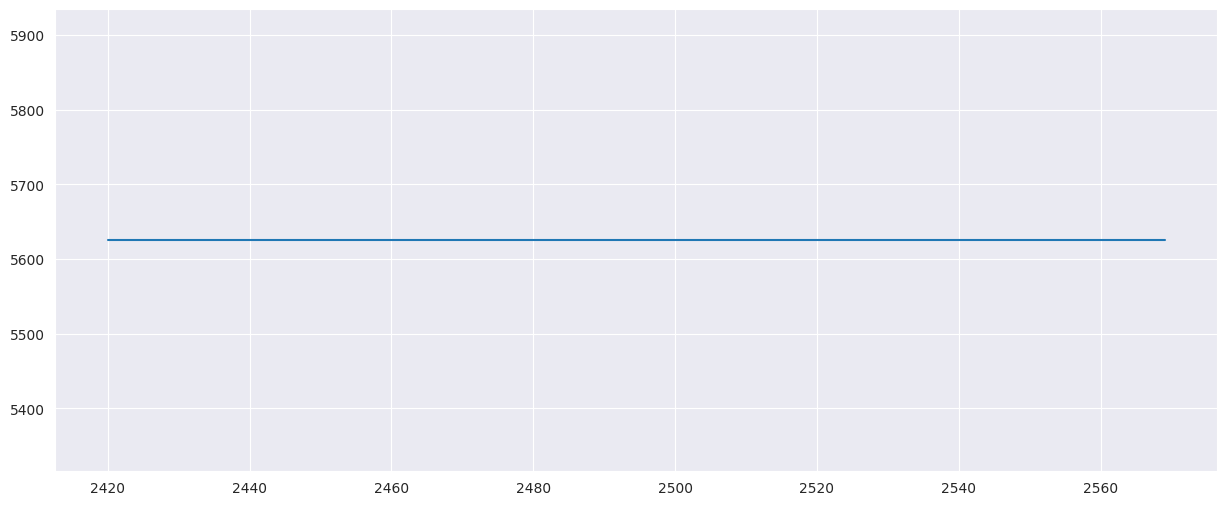

In [59]:
plt.plot(forecast)